# Financial Data Analytics using Python




## Loading Packages

In [ ]:
!pip install yfinance
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Loading Dataset

The resulting object aapl is a DataFrame, which is a 2-dimensional labeled data structure with columns of potentially different types. 


Volume and Adj Close:

The former column is used to register the number of shares that got traded during a single day. The latter, on the other hand, is the adjusted closing price: it’s the closing price of the day that has been slightly adapted to include any actions that occurred at any time before the next day’s open. You can use this column to examine historical returns or when you’re performing a detailed analysis on historical returns.

In [ ]:
aapl = yf.download('AAPL', start="2018-01-01", end="2021-04-10") 
# Return the last rows of `data`
#aapl.tail()
# Return the first rows of `data`
#aapl.head()
# Describe `data`
aapl.describe()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
count,823.000000,823.000000,823.000000,823.000000,823.000000,8.230000e+02
mean,70.071914,70.914915,69.236604,70.112087,68.441796,1.330770e+08
std,30.240085,30.654676,29.686007,30.188254,30.220796,5.957167e+07
min,35.994999,36.430000,35.500000,35.547501,34.257286,4.544800e+07
25%,46.932501,47.311251,46.518751,46.983749,45.049238,9.183435e+07
50%,55.250000,55.812500,54.707500,55.267502,53.385513,1.170920e+08
75%,87.581249,88.331253,86.233749,87.663750,86.187466,1.568486e+08
max,143.600006,145.089996,141.369995,143.160004,141.246170,4.265100e+08


Alternatively, you can load in a data set that has been retrieved for you already from Yahoo! Finance: 

In [ ]:

aapl = pd.read_csv("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/aapl.csv", header=0, index_col= 0, names=['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], parse_dates=True)

Second approach
(Quandl, to get data from Google Finance!)

In [ ]:
!pip install quandl
import quandl 
aapl = quandl.get("WIKI/AAPL", start_date="2006-10-01", end_date="2012-01-01")

#give me first rows of `data`
aapl.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-10-02,75.10,75.870,74.30,74.86,25451400.0,0.0,1.0,9.651397,9.750352,9.548586,9.620553,178159800.0
2006-10-03,74.45,74.950,73.19,74.07,28239600.0,0.0,1.0,9.567863,9.632120,9.405935,9.519027,197677200.0
2006-10-04,74.10,75.462,73.16,75.38,29610100.0,0.0,1.0,9.522883,9.697919,9.402080,9.687381,207270700.0
2006-10-05,74.53,76.160,74.13,74.83,24424400.0,0.0,1.0,9.578144,9.787621,9.526738,9.616698,170970800.0
2006-10-06,74.42,75.040,73.81,74.22,16677100.0,0.0,1.0,9.564007,9.643686,9.485614,9.538304,116739700.0


 If you like to save this data to a csv file with the to_csv() function from pandas and that you can use the read_csv() function to read the data back into Python. This is extremely handy in cases where, for example, the Yahoo API endpoint has changed, and you don’t have access to your data any longer :)

In [ ]:
import pandas as pd
aapl.to_csv(r'C:\Users\sasan\Desktop\face jokes\appl.csv')
df = pd.read_csv(r'C:\Users\sasan\Desktop\face jokes\appl.csv', header=0, index_col='Date', parse_dates=True)
df

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-10-02,75.10,75.870,74.300,74.86,25451400.0,0.0,1.0,9.651397,9.750352,9.548586,9.620553,178159800.0
2006-10-03,74.45,74.950,73.190,74.07,28239600.0,0.0,1.0,9.567863,9.632120,9.405935,9.519027,197677200.0
2006-10-04,74.10,75.462,73.160,75.38,29610100.0,0.0,1.0,9.522883,9.697919,9.402080,9.687381,207270700.0
2006-10-05,74.53,76.160,74.130,74.83,24424400.0,0.0,1.0,9.578144,9.787621,9.526738,9.616698,170970800.0
2006-10-06,74.42,75.040,73.810,74.22,16677100.0,0.0,1.0,9.564007,9.643686,9.485614,9.538304,116739700.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-23,399.69,403.590,399.495,403.33,9621400.0,0.0,1.0,51.365736,51.866940,51.340676,51.833526,67349800.0
2011-12-27,403.10,409.090,403.020,406.53,9467000.0,0.0,1.0,51.803968,52.573767,51.793687,52.244771,66269000.0
2011-12-28,406.89,408.250,401.340,402.64,8166500.0,0.0,1.0,52.291036,52.465815,51.577784,51.744852,57165500.0


## Working With Time Series Data

lets look at index, columns and the last ten rows of a particular column. It is called subsetting because you take a small subset of your data. The result of the subsetting is a Series, which is a one-dimensional labeled array that is capable of holding any type.

In [ ]:
# Inspect the index 
#aapl.index

# Inspect the columns
#aapl.columns

# Select only the last 10 observations of `Close`
ts = aapl['Close'][-10:]
print(ts)
# Check the type of `ts` 
type(ts)

Date
2021-03-26    121.209999
2021-03-29    121.389999
2021-03-30    119.900002
2021-03-31    122.150002
2021-04-01    123.000000
2021-04-05    125.900002
2021-04-06    126.209999
2021-04-07    127.900002
2021-04-08    130.360001
2021-04-09    133.000000
Name: Close, dtype: float64


pandas.core.series.Series

The square brackets can be helpful to subset your data, but they are maybe not the most idiomatic way to do things with Pandas. That’s why you should also take a look at the loc() and iloc() functions: you use the former for label-based indexing and the latter for positional indexing

In [ ]:
# Inspect the first rows of November-December 2006
#print(aapl.loc[pd.Timestamp('2018-11-01'):pd.Timestamp('2018-12-31')].head())

# Inspect the first rows of 2018 
#print(aapl.loc['2018'].head())

# Inspect Feb 2018
#print(aapl.iloc[21:40])

# Inspect the 'Open' and 'Close' values at 2018-2-01 and 2018-2-28
print(aapl.iloc[[21, 40], [0, 3]])

                 Open   Close
Date                         
2018-02-01  41.792500  41.945
2018-03-01  44.634998  43.750


If you look more closely at the pattern, you’ll see that it’s usually two or three days that are missing; These days are traditionally weekend days or public holidays and aren’t part of your data. 

In [ ]:
# Sample 20 rows
#sample = aapl.sample(20)

# Print `sample`
#print(sample)

# Resample to monthly level 
monthly_aapl = aapl.resample('M').mean()

print(monthly_aapl)



#from google.colab import data_table
#data_table.DataTable(aapl)


#print(monthly_aapl)
#type(monthly_aapl)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-01-31   43.505357   43.800834   43.204524   43.501309   41.302320   
2018-02-28   41.819079   42.471973   41.369869   41.909737   39.904413   
2018-03-31   43.761786   44.199881   43.265358   43.624048   41.587725   
2018-04-30   42.441310   42.914405   42.073095   42.458572   40.476652   
2018-05-31   46.239091   46.617273   45.965568   46.384205   44.328772   
2018-06-30   47.180119   47.457976   46.854762   47.155357   45.127544   
2018-07-31   47.549048   47.885000   47.253690   47.577857   45.531875   
2018-08-31   53.121739   53.640326   52.826413   53.336522   51.169046   
2018-09-30   55.582763   56.132632   55.019474   55.518421   53.317310   
2018-10-31   55.300000   55.985218   54.468587   55.211413   53.022473   
2018-11-30   47.954881   48.487381   47.175119   47.808929   46.031985   
2018-12-31   41.310789   41.830000   4

The resample() function is often used because it provides elaborate control and more flexibility on the frequency conversion of your times series: besides specifying new time intervals yourself and specifying how you want to handle missing data, you also have the option to indicate how you want to resample your data

you might already begin to calculate the differences between the opening and closing prices per day. You store the result in a new column of the aapl DataFrame called diff, and then you delete it again with the help of del:

In [ ]:
# Add a column `diff` to `aapl` 
#aapl['diff'] = aapl.Open - aapl.Close
#print(aapl)
# Delete the new `diff` column
del aapl['diff']
print(aapl)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-01-02   42.540001   43.075001   42.314999   43.064999   40.888069   
2018-01-03   43.132500   43.637501   42.990002   43.057499   40.880947   
2018-01-04   43.134998   43.367500   43.020000   43.257500   41.070839   
2018-01-05   43.360001   43.842499   43.262501   43.750000   41.538445   
2018-01-08   43.587502   43.902500   43.482498   43.587502   41.384155   
...                ...         ...         ...         ...         ...   
2021-04-05  123.870003  126.160004  123.070000  125.900002  124.402534   
2021-04-06  126.500000  127.129997  125.650002  126.209999  124.708847   
2021-04-07  125.830002  127.919998  125.139999  127.900002  126.378754   
2021-04-08  128.949997  130.389999  128.520004  130.360001  128.809479   
2021-04-09  129.800003  133.039993  129.470001  133.000000  131.418091   

               Volume  
Date         

##Visualizing Time Series Data
Just use the plot() function and pass the relevant arguments to it. Additionally, you can also add the grid argument to indicate that the plot should also have a grid in the background

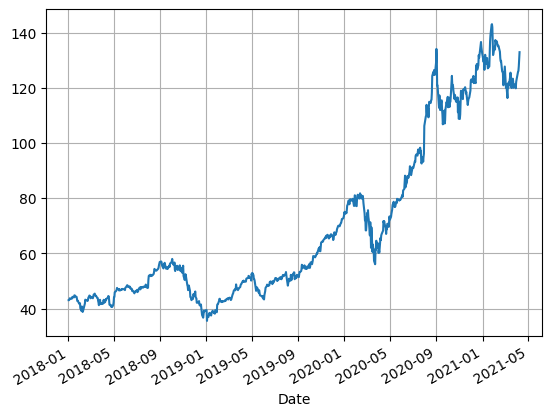

In [ ]:
# Import Matplotlib's `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Plot the closing prices for `aapl`
aapl['Close'].plot(grid=True)

# Show the plot
plt.show()

##Common Financial Analysis
In the rest of this section, you’ll learn more about the returns, moving windows, volatility calculation and Ordinary Least-Squares Regression (OLS).

#Returns
The simple daily percentage change doesn’t take into account dividends and other factors and represents the amount of percentage change in the value of a stock over a single day of trading. You will find that the daily percentage change is easily calculated using pct_change() function

In [ ]:
# Assign `Adj Close` to `daily_close`
daily_close = aapl[['Adj Close']]

# Daily returns
daily_pct_c = daily_close.pct_change()

# Replace NA values with 0
daily_pct_c.fillna(0, inplace=True)

# Inspect daily returns
print(daily_pct_c)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print(daily_log_returns)

            Adj Close
Date                 
2018-01-02   0.000000
2018-01-03  -0.000174
2018-01-04   0.004645
2018-01-05   0.011385
2018-01-08  -0.003714
...               ...
2021-04-05   0.023577
2021-04-06   0.002462
2021-04-07   0.013390
2021-04-08   0.019234
2021-04-09   0.020252

[823 rows x 1 columns]
            Adj Close
Date                 
2018-01-02        NaN
2018-01-03  -0.000174
2018-01-04   0.004634
2018-01-05   0.011321
2018-01-08  -0.003721
...               ...
2021-04-05   0.023304
2021-04-06   0.002459
2021-04-07   0.013302
2021-04-08   0.019051
2021-04-09   0.020049

[823 rows x 1 columns]


want to know the monthly or quarterly returns? In such cases, you can fall back on the resample(), which you already saw in the first part of this tutorial.

In [ ]:
# Resample `aapl` to business months, take last observation as value 
daily_close = aapl[['Adj Close']]



monthly = daily_close.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()


# Resample `aapl` to quarters, take the mean as value per quarter
#quarter = aapl.resample("4M").mean()

# Calculate the quarterly percentage change
#quarter.pct_change()

,Adj Close
Date,
2018-01-31,NaN
2018-02-28,0.068185
2018-03-30,-0.058051
2018-04-30,-0.015020
2018-05-31,0.135124
2018-06-29,-0.009418
2018-07-31,0.027983
2018-08-31,0.200422
2018-09-28,-0.008303


Using pct_change() is quite the convenience, but it also obscures how exactly the daily percentages are calculated. That’s why you can alternatively make use of Pandas’ shift() function instead of using pct_change(). You then divide the daily_close values by the daily_close.shift(1) -1. By using this function, however, you will be left with NA values at the beginning of the resulting DataFrame.

In [ ]:
# Daily returns
daily_pct_c = daily_close / daily_close.shift(1) - 1
#explain why this formula works?

# Print `daily_pct_c`
print(daily_pct_c)

            Adj Close
Date                 
2018-01-02        NaN
2018-01-03  -0.000174
2018-01-04   0.004645
2018-01-05   0.011385
2018-01-08  -0.003714
...               ...
2021-04-05   0.023577
2021-04-06   0.002462
2021-04-07   0.013390
2021-04-08   0.019234
2021-04-09   0.020252

[823 rows x 1 columns]



task : calculate the daily log returns with the help of Pandas’ shift() function


you can plot the distribution of daily_pct_change:

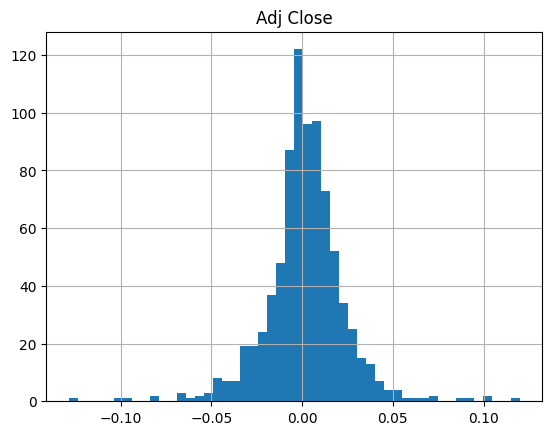

        Adj Close
count  822.000000
mean     0.001663
std      0.021981
min     -0.128647
25%     -0.007956
50%      0.001539
75%      0.012312
max      0.119808


In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot the distribution of `daily_pct_c`
daily_pct_c.hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_c.describe())

The cumulative daily rate of return is useful to determine the value of an investment at regular intervals. You can calculate the cumulative daily rate of return by using the daily percentage change values, adding 1 to them and calculating the cumulative product with the resulting values:

            Adj Close
Date                 
2018-01-02        NaN
2018-01-03   0.999826
2018-01-04   1.004470
2018-01-05   1.015906
2018-01-08   1.012133
...               ...
2021-04-05   3.042514
2021-04-06   3.050006
2021-04-07   3.090847
2021-04-08   3.150295
2021-04-09   3.214094

[823 rows x 1 columns]


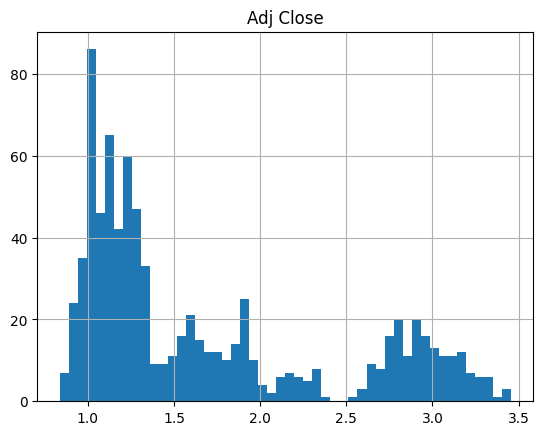

In [ ]:

# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_c).cumprod()

# Print `cum_daily_return`
print(cum_daily_return)

cum_daily_return.hist(bins=50)

# Show the plot
plt.show()

Note that you can use can again use Matplotlib to quickly plot the cum_daily_return; Just add the plot() function to it and, optionally, determine the figsize or the size of the figure:

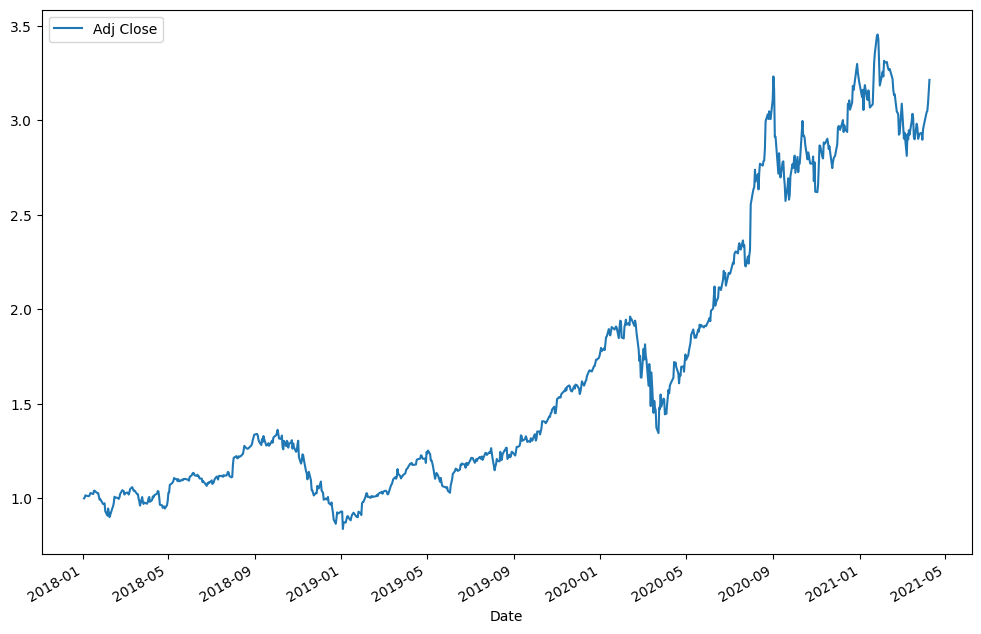

In [ ]:

# Import matplotlib
import matplotlib.pyplot as plt 

# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))

# Show the plot
plt.show()

want to see the monthly returns? remember that you can easily use the resample() function to bring the cum_daily_return to the monthly level:

            Adj Close
Date                 
2018-01-31   1.010638
2018-02-28   0.975943
2018-03-31   1.017112
2018-04-30   0.989938
2018-05-31   1.084149
2018-06-30   1.103685
2018-07-31   1.113574
2018-08-31   1.251442
2018-09-30   1.303982
2018-10-31   1.296771
2018-11-30   1.125805
2018-12-31   0.967912
2019-01-31   0.908398
2019-02-28   1.015077
2019-03-31   1.084660
2019-04-30   1.186575
2019-05-31   1.134742
2019-06-30   1.146311
2019-07-31   1.219066
2019-08-31   1.220919
2019-09-30   1.299896
2019-10-31   1.403005
2019-11-30   1.569180
2019-12-31   1.653863
2020-01-31   1.865529
2020-02-29   1.865133
2020-03-31   1.573368
2020-04-30   1.632971
2020-05-31   1.862208
2020-06-30   2.078741
2020-07-31   2.297905
2020-08-31   2.824662
2020-09-30   2.773195
2020-10-31   2.804219
2020-11-30   2.818077
2020-12-31   3.071527
2021-01-31   3.210187
2021-02-28   3.177582
2021-03-31   2.945157
2021-04-30   3.086698


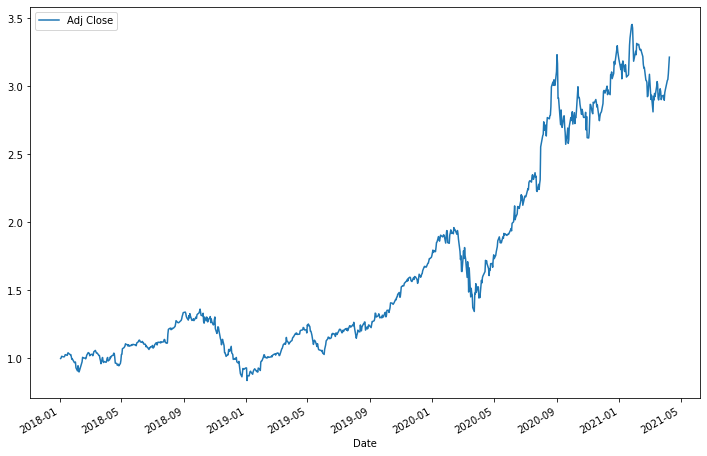

In [ ]:

# Resample the cumulative daily return to cumulative monthly return 
cum_monthly_return = cum_daily_return.resample("M").mean()

# Print the `cum_monthly_return`
print(cum_monthly_return)

cum_daily_return.plot(figsize=(12,8))

# Show the plot
plt.show()

Knowing how to calculate the returns is a valuable skill, but you’ll often see that these numbers don’t really say much when you don’t compare them to other stock. That’s why you’ll often see examples where two or more stocks are compared. In the rest of this section, you’ll focus on getting more data from Yahoo! Finance so that you can calculate the daily percentage change and compare the results.

Let’s start! Get more data from Yahoo! Finance first. You can easily do this by making a function that takes in the ticker or symbol of the stock, a start date and an end date. The next function that you see, data(), then takes the ticker to get your data from the startdate to the enddate and returns it so that the get() function can continue. You map the data with the right tickers and return a DataFrame that concatenates the mapped data with tickers.

Check out the code below, where the stock data from Apple, Microsoft, IBM, and Google are loaded and gathered into one big DataFrame:

In [ ]:
from pandas_datareader import data as pdr
import yfinance

def get(tickers, startdate, enddate):
    def data(ticker):
        return (yf.download(ticker, start=startdate, end=enddate))
    datas = map (data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2016, 10, 1), datetime.datetime(2021, 5, 1))
all_data.head()



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Open       High        Low      Close  Adj Close  \
Ticker Date                                                                
AAPL   2016-10-03  28.177500  28.262501  28.070000  28.129999  26.151075   
       2016-10-04  28.264999  28.577499  28.157499  28.250000  26.262629   
       2016-10-05  28.350000  28.415001  28.172501  28.262501  26.274250   
       2016-10-06  28.424999  28.584999  28.282499  28.472500  26.469477   
       2016-10-07  28.577499  28.639999  28.377501  28.514999  26.508989   

                      Volume  
Ticker Date                   
AAPL   2016-10-03   86807200  
       2016-10-04  118947200  
       2016-10-05   85812400  
       2016-10-06  115117200  
       2016-10-07   97433600

Second approach with the list of data as csv file

In [ ]:
import pickle
TickersList_df = pd.read_csv("TickersList.csv")
TickersList_df
period="1mo"
interval="2m"
All_Data = dict()
for ticker in TickersList_df.ticker.to_list():
    All_Data[ticker] = yf.download(tickers=ticker ,period=period, interval=interval)
with open("All_Data_dict.pkl", "wb") as f:
    pickle.dump(All_Data, f, pickle.HIGHEST_PROTOCOL)

Plot the return for all!

<ipython-input-4-fb5c9b2effd7>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')


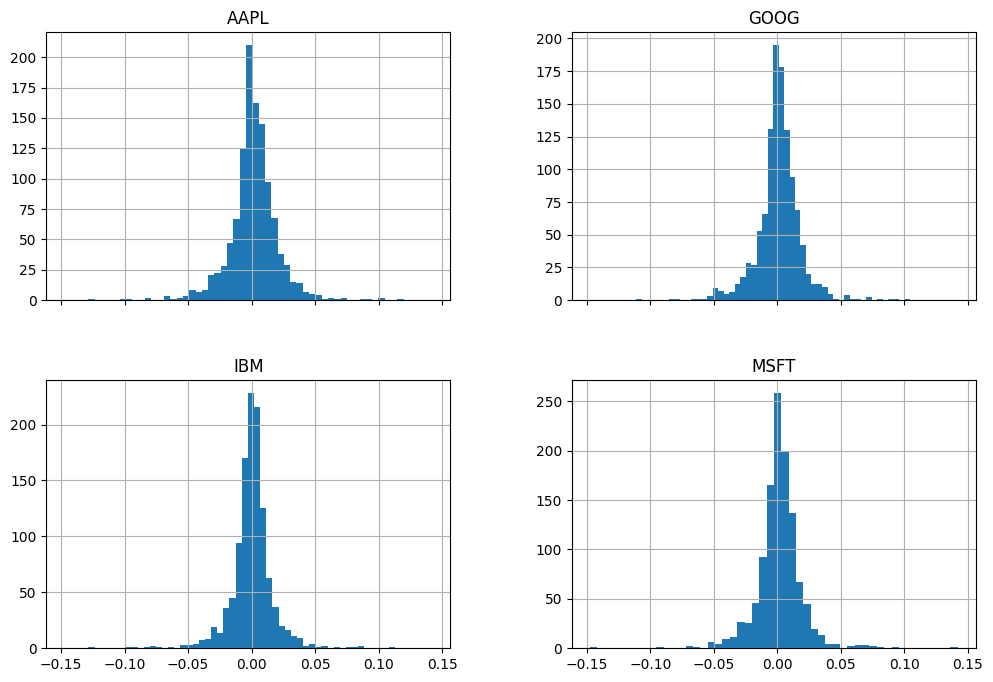

In [ ]:
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

Another useful plot is the scatter matrix with scatter_matrix() function. As arguments, you pass the daily_pct_change and as a diagonal, you set that you want to have a Kernel Density Estimate (KDE) plot. Additionally, you can set the transparency with the alpha argument and the figure size with figsize..

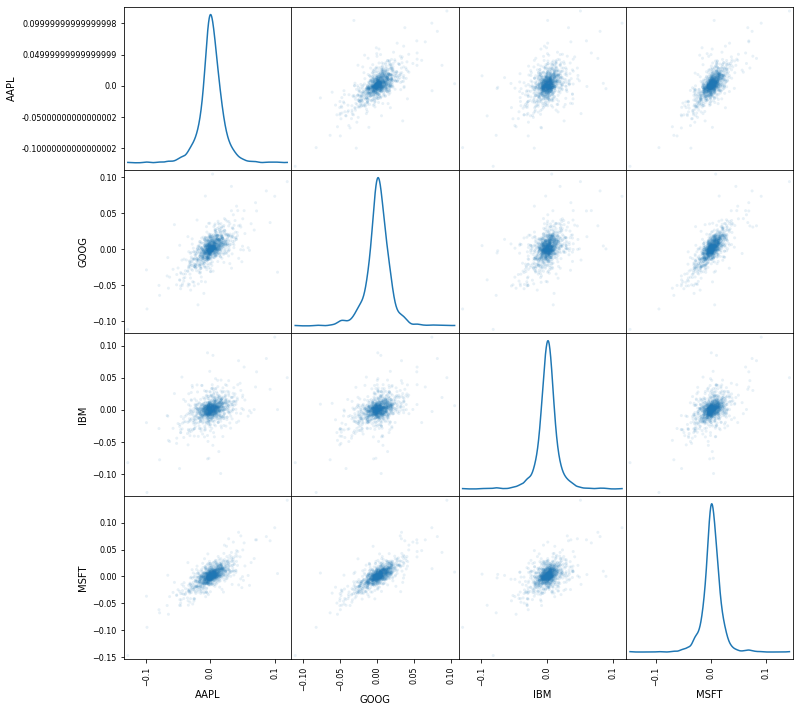

In [ ]:
# Plot a scatter matrix with the `daily_pct_change` data 
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()

Congratulations! You’ve successfully made it through the first common financial analysis, where you explored returns! Now it’s time to move on to the second one, which are the moving windows.

##Moving Windows
Moving windows are there when you compute the statistic on a window of data represented by a particular period of time and then slide the window across the data by a specified interval. That way, the statistic is continually calculated as long as the window falls first within the dates of the time series.

There are a lot of functions in Pandas to calculate moving windows, such as rolling_mean(), rolling_std()

In [ ]:
# Isolate the adjusted closing prices 
adj_close_px = aapl['Adj Close']

# Calculate the moving average for 40 window
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
moving_avg[-10:]

Date
2021-03-26    125.233947
2021-03-29    124.977703
2021-03-30    124.630882
2021-03-31    124.318675
2021-04-01    124.053365
2021-04-05    123.774596
2021-04-06    123.513983
2021-04-07    123.291412
2021-04-08    123.151842
2021-04-09    123.092802
Name: Adj Close, dtype: float64

try out some of the other standard moving windows functions that come with the Pandas package, such as rolling_max(), rolling_var() or rolling_median(), in the IPython console. Note that you can also use rolling() in combination with max(), var() or median() to accomplish the same results!

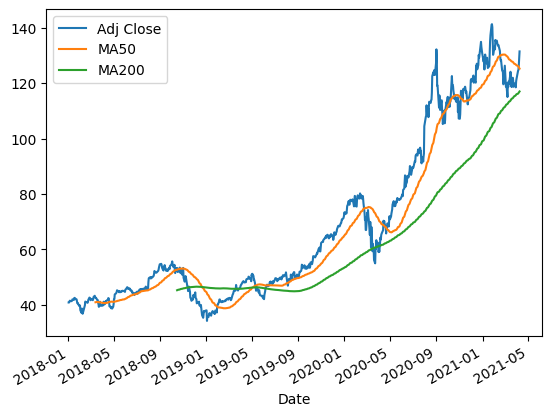

In [ ]:
# Short moving window rolling mean
aapl['MA50'] = adj_close_px.rolling(window=50).mean()

# Long moving window rolling mean
aapl['MA200'] = adj_close_px.rolling(window=200).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
aapl[['Adj Close', 'MA50', 'MA200']].plot()

plt.show()

#Volatility Calculation
The volatility of a stock is a measurement of the change in variance in the returns of a stock over a specific period of time. It is common to compare the volatility of a stock with another stock to get a feel for which may have less risk or to a market index to examine the stock’s volatility in the overall market

In [ ]:
##The volatility is calculated by taking a rolling window standard deviation on the percentage change in a stock.
# You can clearly see this in the code because you pass daily_pct_change and the min_periods to rolling_std().

# Define the minumum of periods to consider 
min_periods = 75

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

#if you take the window wider and make min_periods larger, your result will become less representative. 
#If you make it smaller and make the window more narrow, the result will come closer to the standard deviation.

NameError: ignored

##Ordinary Least-Squares Regression (OLS)

In [ ]:
# we are uisng statsmodels library, which not only provides you with the classes and functions to estimate 
#many different statistical models but also allows you to conduct statistical tests and perform statistical data exploration.

!pip install statsmodels
import statsmodels.api as sm
from pandas import tseries
#from pandas.core import datetools

# Isolate the adjusted closing price
all_adj_close = all_data[['Adj Close']]

# Calculate the returns 
all_returns = np.log(all_adj_close / all_adj_close.shift(1))

# Isolate the AAPL returns 
aapl_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'AAPL']
aapl_returns.index = aapl_returns.index.droplevel('Ticker')

# Isolate the MSFT returns
msft_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'MSFT']
msft_returns.index = msft_returns.index.droplevel('Ticker')

# Build up a new DataFrame with AAPL and MSFT returns

#((Note that you add [1:] to the concatenation of the AAPL and MSFT return data 
#so that you don’t have any NaN values that can interfere with your model.))

return_data = pd.concat([aapl_returns, msft_returns], axis=1)[1:]
return_data.columns = ['AAPL', 'MSFT']

# Add a constant 
X = sm.add_constant(return_data['AAPL'])

# Construct the model
model = sm.OLS(return_data['MSFT'],X).fit()

# Print the summary
print(model.summary())

# The Dep. Variable, which indicates which variable is the response in the model
# 'Model', in this case, is OLS. It’s the model you’re using in the fit
# 'Method' to indicate how the parameters of the model were calculated. In this case, you see that this is set at Least Squares.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     1399.
Date:                Fri, 12 May 2023   Prob (F-statistic):          5.68e-201
Time:                        08:43:51   Log-Likelihood:                 3469.0
No. Observations:                1151   AIC:                            -6934.
Df Residuals:                    1149   BIC:                            -6924.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

P > |t| indicates the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response. In this case, you see that the constant has a value of 0.24, while AAPL is set at 0.000.

Omnibus, which is the Omnibus D’Angostino’s test: it provides a combined statistical test for the presence of skewness and kurtosis.


Durbin-Watson is a test for the presence of autocorrelation, and the Jarque-Bera is another test of the skewness and kurtosis. You can also turn the result of this test into a probability, as you can see in Prob (JB).
Lastly, you have the Cond. No, which tests the multicollinearity.

Plot the Ordinary Least-Squares Regression

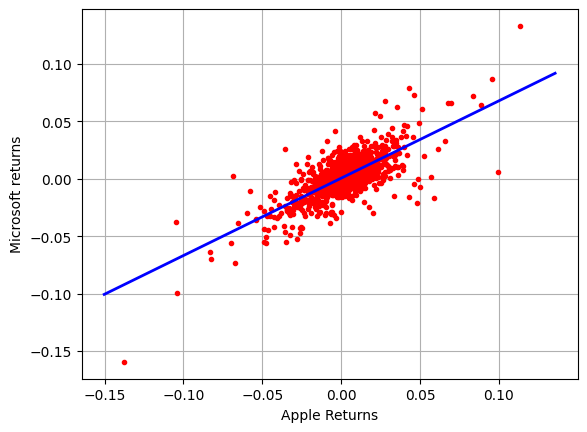

In [ ]:
plt.plot(return_data['AAPL'], return_data['MSFT'], 'r.')

ax = plt.axis()
x = np.linspace(ax[0], ax[1] + 0.01)

plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2)

plt.grid(True)
plt.axis('tight')
plt.xlabel('Apple Returns')
plt.ylabel('Microsoft returns')

plt.show()

you can also use the rolling correlation of returns as a way to crosscheck your results.

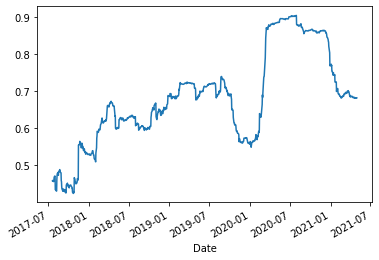

In [ ]:
return_data['MSFT'].rolling(window=200).corr(return_data['AAPL']).plot()
plt.show()

##Building A Trading Strategy With Python

Common Trading Strategies:
 In general, there are two common trading strategies: the momentum strategy (divergence or trend trading) and the reversion strategy.

 Some examples of momentum strategy are the moving average crossover, the dual moving average crossover, and turtle trading (buy futures on a 20-day high and sell on a 20-day low)

The reversion strategy is also known as convergence or cycle trading. This strategy departs from the belief that the movement of a quantity will eventually reverse (stocks return to their mean) . Another example of this strategy,besides the mean reversion strategy, is the pairs trading mean-reversion.  


##A Simple Trading Strategy
The strategy that you’ll be developing is simple: you create two separate Simple Moving Averages (SMA) of a time series with differing lookback periods, let’s say, 40 days and 100 days. If the short moving average exceeds the long moving average then you go long, if the long moving average exceeds the short moving average then you exit.

In [ ]:
# Initialize the short and long windows
short_window = 40
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=aapl.index)  #make an empty signals DataFrame, but do make sure to copy the index of your aapl data
signals['signal'] = 0.0  #Create a column in your empty signals DataFrame that is named signal 
#and initialize it by setting the value for all rows in this column to 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = aapl['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

#1 as the minimum number of observations in the window that are required to have a value, and False, 
#so that the labels are not set at the center of the window.
 #Next, don’t forget to also chain the mean() function so that you calculate the rolling mean.


# Create long simple moving average over the long window
signals['long_mavg'] = aapl['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
#you take the difference of the signals in order to generate actual trading orders.
signals['positions'] = signals['signal'].diff()

# Print `signals`
print(signals)

            signal  short_mavg   long_mavg  positions
Date                                                 
2018-01-02     0.0   43.064999   43.064999        NaN
2018-01-03     0.0   43.061249   43.061249        0.0
2018-01-04     0.0   43.126666   43.126666        0.0
2018-01-05     0.0   43.282499   43.282499        0.0
2018-01-08     0.0   43.343500   43.343500        0.0
...            ...         ...         ...        ...
2021-04-05     0.0  125.264499  126.437700        0.0
2021-04-06     0.0  125.000750  126.536600        0.0
2021-04-07     0.0  124.775500  126.655900        0.0
2021-04-08     0.0  124.634250  126.764600        0.0
2021-04-09     0.0  124.574500  126.902500        0.0

[823 rows x 4 columns]


plot all of this (the short and long moving averages, together with the buy and sell signals) with Matplotlib:

Important to grasp here is what the positions and the signal columns mean in this DataFrame. 

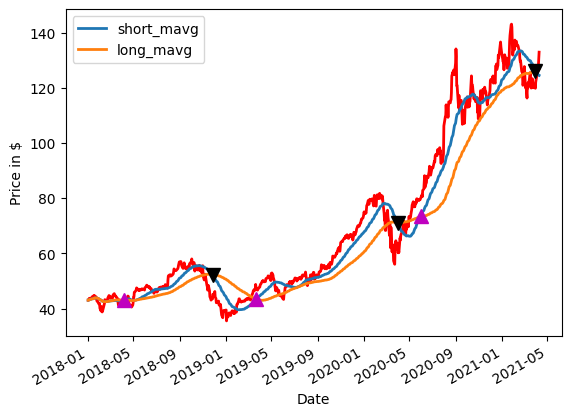

In [ ]:
# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
aapl['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

##Backtesting The Trading Strategy

Backtesting is, besides just “testing a trading strategy”, testing the strategy on relevant historical data to make sure that it’s an actual viable strategy before you start making moves.

#Backtesting Pitfalls?
overfit a model (optimization bias), 

when you ignore strategy rules because you think it’s better like that (interference), 

and when you accidentally introduce information into past data (lookahead bias).

#Backtesting Components
Backtest usually consists of some four essential components

A data handler, which is an interface to a set of data,

A strategy, which generates a signal to go long or go short based on the data,

A portfolio, which generates orders and manages Profit & Loss (also known as “PnL”), and

An execution handler, which sends the order to the broker and receives the “fills” or signals that the stock has been bought or sold.

#Python Tools
the IbPy and ZipLine libraries. The former offers you a Python API for the Interactive Brokers online trading system: you’ll get all the functionality to connect to Interactive Brokers, request stock ticker data, submit orders for stocks,… The latter is an all-in-one Python backtesting framework that powers Quantopian, which you’ll use in this tutorial.


#Backtesting With Zipline & Quantopian
Pandas is good but it’s common to use a backtesting platform, such as Quantopian, for your backtesters. Quantopian is a free, community-centered, hosted platform for building and executing trading strategies. It’s powered by zipline, a Python library for algorithmic trading.

#Implementation Of A Simple Backtester


In [ ]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)  
# Once again, you copy the index from another DataFrame; 
#In this case, this is the signals DataFrame because you want to consider the time frame for which you have generated the signals.

# Buy a 100 shares
positions['AAPL'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned 
#A new DataFrame portfolio is created to store the market value of an open position  
portfolio = positions.multiply(aapl['Adj Close'], axis=0)

# Store the differences in positions (or number of stock)
pos_diff = positions.diff()

# Add `holdings` to portfolio
#you create a new column to the portfolio DataFrame with name holdings,
# which stores the value of the positions or shares you have bought, multiplied by the ‘Adj Close’ price.
portfolio['holdings'] = (positions.multiply(aapl['Adj Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio which is the capital that you still have left to spend
portfolio['cash'] = initial_capital - (pos_diff.multiply(aapl['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio which contains the sum of your cash and the holdings that you own
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio in which you’ll store the returns
portfolio['returns'] = portfolio['total'].pct_change()

Visualize the portfolio value or portfolio['total'] over the years

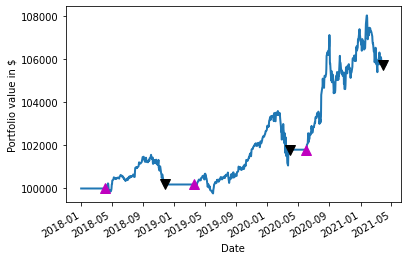

In [ ]:

import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

# Plot the "buy" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')

# Plot the "sell" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

#Improving The Trading Strategy  ?? (self study)
 
You have successfully made a simple trading algorithm and performed backtests via Pandas, how to improve your trading strategy? 


#Evaluating Moving Average Crossover Strategy
You can easily use Pandas to calculate some metrics to further judge your simple trading strategy. 
1. Sharpe ratio (Usually, a ratio greater than 1 is acceptable by investors, 2 is very good and 3 is excellent)



In [ ]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.6987151347573431



2. Maximum Drawdown, which is used to measure the largest single drop from peak to bottom in the value of a portfolio, so before a new peak is achieved. In other words, the score indicates the risk of a portfolio chosen based on a certain strategy.


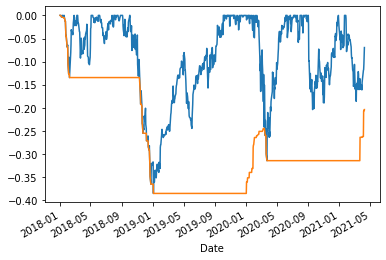

In [ ]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day
rolling_max = aapl['Adj Close'].rolling(window, min_periods=1).max()
daily_drawdown = aapl['Adj Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()